In [1]:
### 4.3.1.1 青少年市場區隔案例 by DBSCAN
## ------------------------------------------------------------------------
import numpy as np
import pandas as pd
teens = pd.read_csv("./snsdata.csv")

In [2]:
# 文件詞項矩陣前面加上入學年、性別、年齡與朋友數等欄位
print(teens.shape) # 30000 * (4 + 36 terms by NLP)

(30000, 40)


In [3]:
# 留意gradyear 的資料型別
print(teens.dtypes)

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object


In [4]:
# gradyear 更新為字串str 型別
teens['gradyear'] = teens['gradyear'].astype('str')
# 除了資料型別外，ftypes 還報導了屬性向量是稀疏還是稠密的
# print(teens.ftypes.head()) # deprecated after 1.0.0
print(teens.dtypes.head())

gradyear       object
gender         object
age           float64
friends         int64
basketball      int64
dtype: object


In [5]:
# 各變數敘述統計值(報表過寬，只呈現部份結果)
print(teens.describe(include='all'))

       gradyear gender           age       friends    basketball  \
count     30000  27276  24914.000000  30000.000000  30000.000000   
unique        4      2           NaN           NaN           NaN   
top        2006      F           NaN           NaN           NaN   
freq       7500  22054           NaN           NaN           NaN   
mean        NaN    NaN     17.993950     30.179467      0.267333   
std         NaN    NaN      7.858054     36.530877      0.804708   
min         NaN    NaN      3.086000      0.000000      0.000000   
25%         NaN    NaN     16.312000      3.000000      0.000000   
50%         NaN    NaN     17.287000     20.000000      0.000000   
75%         NaN    NaN     18.259000     44.000000      0.000000   
max         NaN    NaN    106.927000    830.000000     24.000000   

            football        soccer      softball    volleyball     swimming  \
count   30000.000000  30000.000000  30000.000000  30000.000000  30000.00000   
unique           NaN     

In [6]:
# 各欄位遺缺值統計(只有gender 與age 有遺缺)(注意！此處並未進行遺缺值處理)
print(teens.isnull().sum().head())

gradyear         0
gender        2724
age           5086
friends          0
basketball       0
dtype: int64


In [7]:
# 各詞頻變數標準化建模
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler() # Object-oriented programming paradigm

In [9]:
# 配適與轉換接續完成函數
teens_z = sc.fit_transform(teens.iloc[:,4:])
# 錯誤用法！Python的類別函數不可使用泛函式編程語法
# teens_z = StandardScaler(teens.iloc[:,4:]) # > scikit-learn 0.23.2 可以！

In [10]:
# scikit-learn下preprocessing模組的scale()函數可用泛函式編程語法
from sklearn.preprocessing import scale
teens_z = scale(teens.iloc[:,4:])

In [11]:
# 資料導向程式設計經常輸出與輸入不同調(DataFrame 入ndarray 出)
print(type(teens_z))

<class 'numpy.ndarray'>


In [12]:
# 轉為資料框物件取用describe() 方法確認標準化結果
print(pd.DataFrame(teens_z[:,30:33]).describe())
# mean 5.494864e-17  1.136868e-17 -9.687066e-17 可能數字上會有差異，這說明二進位制的計算機的數值運算不穩定性(numerical instability)

                  0             1             2
count  3.000000e+04  3.000000e+04  3.000000e+04
mean   5.494864e-17  1.136868e-17 -9.687066e-17
std    1.000017e+00  1.000017e+00  1.000017e+00
min   -2.014763e-01 -1.830317e-01 -2.947932e-01
25%   -2.014763e-01 -1.830317e-01 -2.947932e-01
50%   -2.014763e-01 -1.830317e-01 -2.947932e-01
75%   -2.014763e-01 -1.830317e-01 -2.947932e-01
max    2.575205e+01  2.843431e+01  3.493308e+01


In [13]:
# Python DBSCAN集群
from sklearn.cluster import DBSCAN
mdl = DBSCAN(eps=5, min_samples=5) # More computation time than k-means and for larger 'eps' and 'min_samples'.
# eps=3.8, min_samples=10

In [14]:
# 配適前空模的屬性與方法
pre = dir(mdl)
# 空模的幾個屬性與方法
print(pre[31:36])

['_check_feature_names', '_check_n_features', '_estimator_type', '_get_default_requests', '_get_metadata_request']


In [15]:
# 以標準化文件詞項矩陣配適集群模型
import time
start = time.time()
mdl.fit(teens_z)
end = time.time()
print("DBSCAN fitting spent {} seconds".format(end - start))

DBSCAN fitting spent 16.809983491897583 seconds


In [16]:
# 配適後實模的屬性與方法
post = dir(mdl)
# 實模的幾個屬性與方法
print(post[51:56])

['get_metadata_routing', 'get_params', 'labels_', 'leaf_size', 'metric']


In [17]:
# 實模與空模屬性和方法的差異(前或後有下底線_)
print(list(set(post) - set(pre)))

['core_sample_indices_', 'components_', 'labels_', 'n_features_in_']


In [18]:
# res.labels_ 為30,000 名訓練樣本的歸群標籤
# import sys
# np.set_printoptions(threshold=sys.maxsize)
print(mdl.labels_.shape)

(30000,)


In [19]:
# 各群人數分佈(思考numpy下如何做！) 317群
print(pd.Series(mdl.labels_).value_counts())

 0    27602
-1     2349
 1       30
 3        9
 4        6
 2        4
Name: count, dtype: int64


In [20]:
# 核心樣本點的編號
dir(mdl)
mdl.core_sample_indices_

array([    0,     2,     3, ..., 29997, 29998, 29999], dtype=int64)

In [21]:
# 前10 個樣本的群編號
print (mdl.labels_[:10])

[ 0 -1  0  0  0  0  0  0  0  0]


In [22]:
# 26845核心樣本點的特徵數值
print(mdl.components_.shape)
print(mdl.components_)

(26845, 36)
[[-0.33221726 -0.35769737 -0.2428741  ... -0.26153016 -0.22040264
  -0.1749076 ]
 [-0.33221726  1.06004883 -0.2428741  ...  2.02790809 -0.22040264
  -0.1749076 ]
 [-0.33221726 -0.35769737 -0.2428741  ... -0.26153016 -0.22040264
  -0.1749076 ]
 ...
 [-0.33221726  1.06004883 -0.2428741  ... -0.26153016 -0.22040264
  -0.1749076 ]
 [-0.33221726 -0.35769737 -0.2428741  ... -0.26153016 -0.22040264
  -0.1749076 ]
 [ 2.15319868 -0.35769737 -0.2428741  ... -0.26153016 -0.22040264
  -0.1749076 ]]


In [23]:
# 把dbscan分群結果加入dataframe
##### 以下請同學練習如何修改
# 轉換成pandas 資料框，給予群編號與字詞名稱，方便結果詮釋
cen = pd.DataFrame(columns=teens.iloc[:,4:].columns)
for i in range(5):
    cen.loc[len(cen)] = teens_z[np.where(mdl.labels_ == i)[0]].mean(axis=0)
#cen = pd.DataFrame(res.cluster_centers_, index = range(5),
#columns = teens.iloc[:,4:].columns)
print(cen)

   basketball  football    soccer  softball  volleyball  swimming  \
0   -0.067351 -0.057116 -0.040716 -0.044054   -0.047713 -0.041606   
1    2.277469  2.714086  2.264729 -0.172864   -0.171581  0.062414   
2   -0.021540 -0.357697 -0.242874 -0.217928    0.166997 -0.259971   
3    1.324727  1.217576  0.847388  1.284194   -0.050040 -0.045048   
4   -0.332217 -0.121406  0.120547  0.232709    0.036775 -0.259971   

   cheerleading  baseball    tennis    sports  ...    blonde      mall  \
0     -0.043412 -0.044608 -0.032138 -0.066861  ... -0.021241 -0.068519   
1      2.709122  3.568471 -0.104458  0.056679  ...  1.888358 -0.130364   
2     -0.207327 -0.201131 -0.168939 -0.297123  ... -0.050937 -0.369915   
3      1.736972  1.715616 -0.168939  1.353955  ...  0.463920  1.227092   
4     -0.207327 -0.201131 -0.168939 -0.297123  ... -0.050937 -0.369915   

   shopping   clothes  hollister  abercrombie       die     death     drunk  \
0 -0.064194 -0.089064  -0.069002    -0.069245 -0.067499 -0.06

In [24]:
# 每次歸群結果的釋義會有不同
# Princesses: 1
# Criminals: 4
# Basket Cases: 0
# Athletes: 3
# Brains: 2
cluster = {0:'Basket Cases',1:'Princesses',2:'Brains',3:'Athletes',4:'Criminals'}

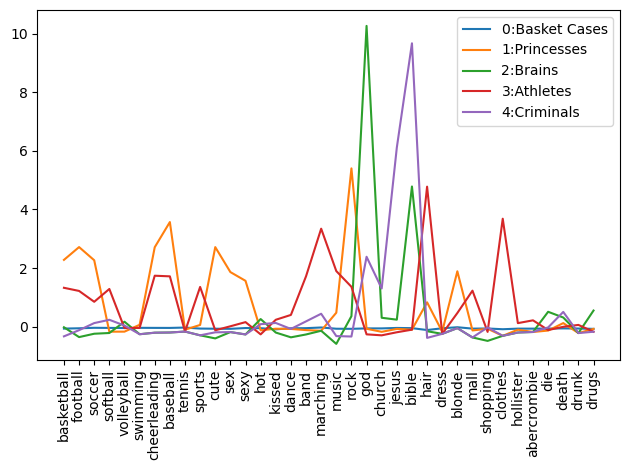

In [25]:
# 各群中心座標矩陣轉置後繪圖
ax = cen.T.plot() # seaborn, ggplot or pandas ?
# 低階繪圖設定x 軸刻度位置
ax.set_xticks(list(range(36)))
# 低階繪圖設定x 軸刻度說明文字
ax.set_xticklabels(list(cen.T.index), rotation=90)
ax.legend(['0:Basket Cases','1:Princesses','2:Brains','3:Athletes','4:Criminals'])
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('sns_lineplot.png')
# fig.savefig('./_img/sns_lineplot.png')

In [26]:
# 以下為課本/講義沒有的補充程式碼，主要在進行事後(建模後)的分析
# 添加群編號於原資料表後
teens = pd.concat([teens, pd.Series(mdl.labels_).rename('cluster')], axis=1)

In [27]:
# 抓集群未使用的三個變量(剛才歸群時未用，但事後分析確有助於了解各群的異同，以及歸群結果的品質)
teens[['gender','age','friends','cluster']][0:5]

,gender,age,friends,cluster
0,M,18.982,7,0
1,F,18.801,0,-1
2,M,18.335,69,0
3,F,18.875,0,0
4,NaN,18.995,10,0


In [28]:
# 各群平均年齡(群組與摘要也！)
teens.groupby('cluster').aggregate({'age': np.mean}) # 同儕間年齡差異不大！

,age
cluster,
-1,17.745795
0,18.018013
1,16.840960
2,15.899667
3,16.454111
4,17.136200


In [29]:
# 新增是否為女生欄位'female'
teens.gender.value_counts()
teens.gender.value_counts(dropna = False)

gender
F      22054
M       5222
NaN     2724
Name: count, dtype: int64

In [30]:
# Equivalent of R/ifelse in Python/Pandas? Compare string columns? (https://stackoverflow.com/questions/35666272/equivalent-of-r-ifelse-in-python-pandas-compare-string-columns#)
def if_this_else_that(x, list_of_checks, yes_label, no_label):
    if x in list_of_checks:
        res = yes_label
    else: 
        res = no_label
    return(res)

In [31]:
teens['female'] = teens['gender'].apply(lambda x: if_this_else_that(x, ['F'], True, False))

In [32]:
teens[['gender', 'female']].head(n=20)

,gender,female
0,M,False
1,F,True
2,M,False
3,F,True
4,NaN,False
5,F,True
6,F,True
7,M,False
8,F,True
9,F,True


In [33]:
teens.female.sum() # 22054

22054

In [34]:
# 各群女生人數比例(群組與摘要也！)
teens.groupby('cluster').aggregate({'female': np.mean})

,female
cluster,
-1,0.838655
0,0.726179
1,0.833333
2,1.000000
3,0.666667
4,0.833333


In [35]:
# 各群朋友數(群組與摘要也！)
teens.groupby('cluster').aggregate({'friends': np.mean})

,friends
cluster,
-1,38.544913
0,29.461996
1,37.600000
2,28.750000
3,32.444444
4,16.166667
